In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import altair as alt

# Part 1 &mdash; improving the examples

**Fix labels to be 1Y, 2Y, etc. (instead of 1J, 2J)**

In [2]:
# Read in the data
df = pd.read_csv("~/Documents/DS_Git/Visualization/Day-1-Visualization-Intro/data/snb-data-rendoblim-en-all-20170502_1430.csv")
df.head()

,Date,D0,Value
0,1988-01,1J,2.887
1,1988-01,2J,3.218
2,1988-01,3J,3.393
3,1988-01,4J,3.554
4,1988-01,5J,3.695


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
df.columns= df.columns.str.replace('J','Y',regex=True) # this line applies a simple string replacement on the columns
df = df
df.head()

D0,10Y,1Y,20Y,2Y,30Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


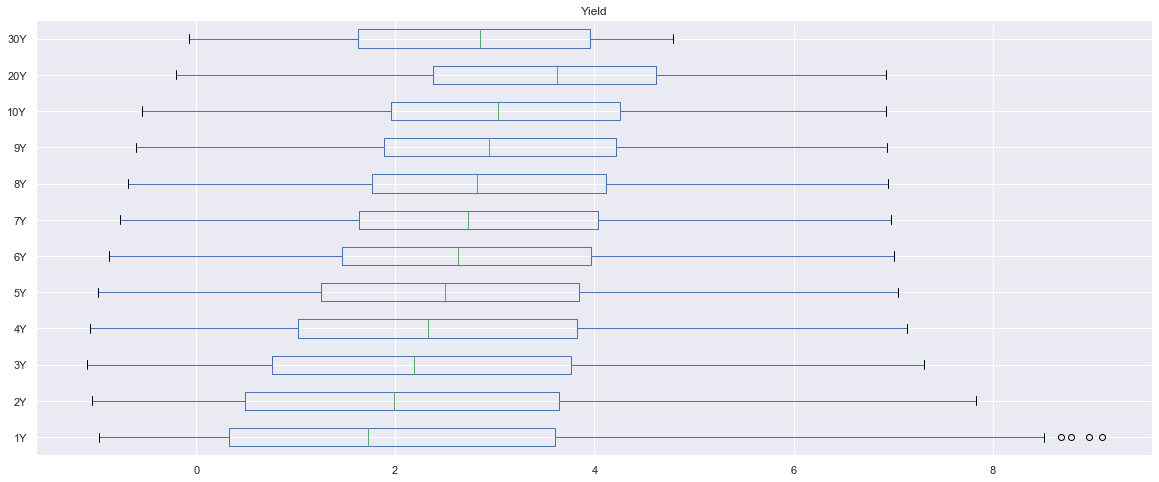

In [4]:
# Plot the boxplot with labels fixed

cols = ["{}Y".format(idx) for idx in range(1, 11)]
cols.extend(['20Y', '30Y'])
ax = df.boxplot(column=cols, vert=False, figsize=(20,8))
ax.set_title('Yield')
None


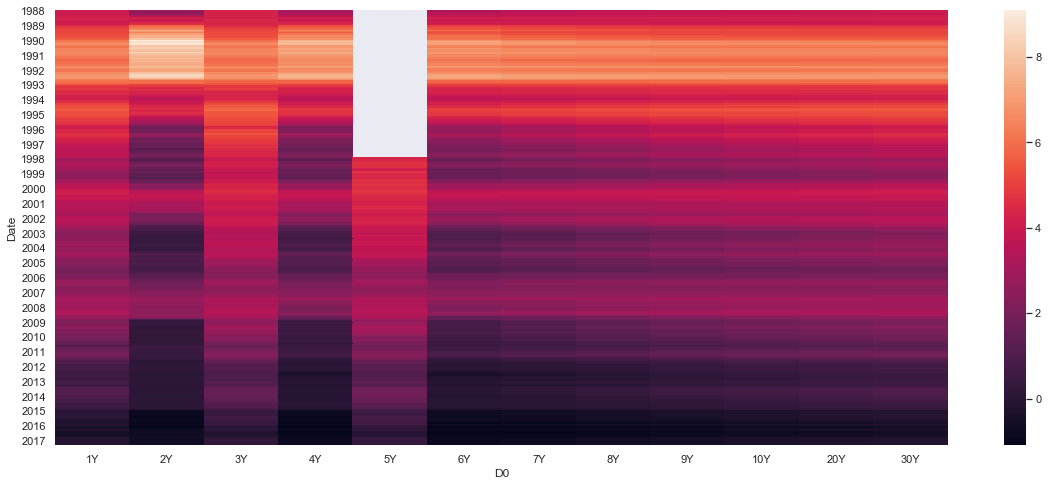

In [5]:
# Plot the heatmap with labels fixed
labels = [t.strftime("%Y") if i%12 == 0 else "" for i, t in enumerate(df.index)] #can list month by adding %Y-%m"
plt.figure(figsize=(20,8))


cols = ["{}Y".format(idx) for idx in range(1, 11)]
cols.extend(['20Y', '30Y'])
ax1 = sns.heatmap(df, xticklabels=cols,yticklabels=labels)
ax1
None




#ax = sns.heatmap(df, yticklabels=labels)



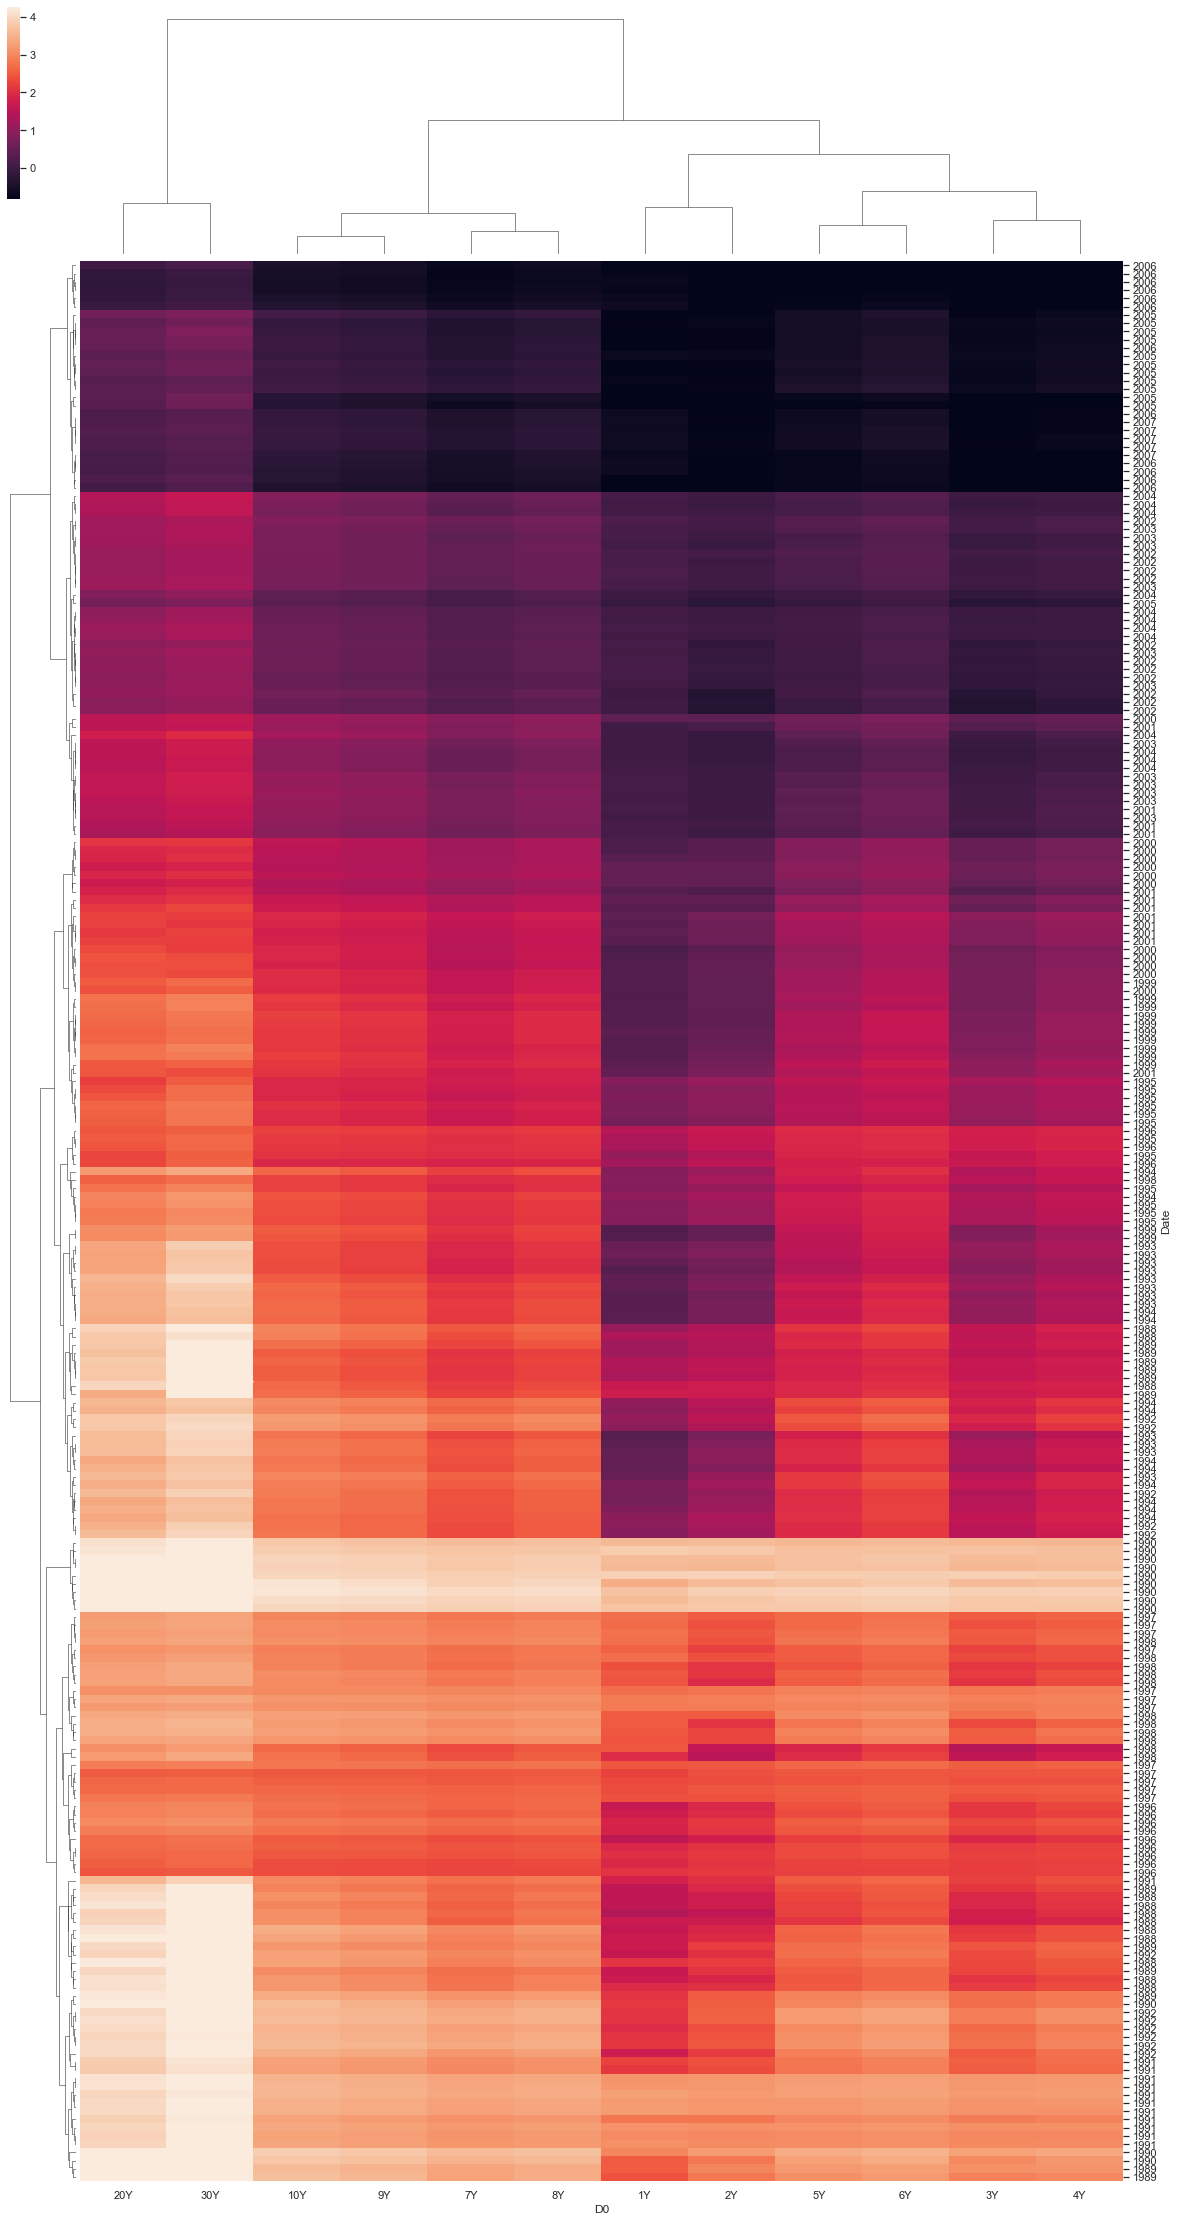

In [6]:
# dendrograms with labels fixed

labels = [t.strftime("%Y") for t in df.index]
cg = sns.clustermap(df.dropna(), yticklabels=labels, robust=True, figsize=(20, 40))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None




# Part 2 &mdash; work with new data

In [7]:
df = pd.read_csv("~/Documents/DS_Git/Visualization/Day-1-Visualization-Intro/data/snb-data-zimoma-en-all-20170502_1430.csv")
df.head()

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.0
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN


In [8]:
# The natural order of duration is ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
pd.unique(df['D0'])

array(['SARON', '1TGT', 'EG3M', '1M', '3M0', '6M', '12M', '3M1', '3M2',
       '3M3', '3M4'], dtype=object)

In [9]:
# line chart of 1TGT series

import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'D0':'Duration'}, inplace=True)

tdf = df.pivot(index='Date', columns='Duration', values='Value').reset_index()
p = figure(x_axis_type="datetime")
p.line(x=tdf['Date'], y=tdf['1TGT'])
show(p)



Loading BokehJS ...

In [10]:
df

,Date,Duration,Value
0,1972-01-01,SARON,NaN
1,1972-01-01,1TGT,0.00000
2,1972-01-01,EG3M,NaN
3,1972-01-01,1M,NaN
4,1972-01-01,3M0,NaN
...,...,...,...
5979,2017-04-01,12M,-0.49160
5980,2017-04-01,3M1,1.17233
5981,2017-04-01,3M2,0.00243
5982,2017-04-01,3M3,0.32525


In [11]:
# boxplots of all series

df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'Duration'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
#df.columns= df.columns.str.replace('J','Y',regex=True) # this line applies a simple string replacement on the columns
df = df
df.head()


Duration,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON
Date,,,,,,,,,,,
1972-01-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


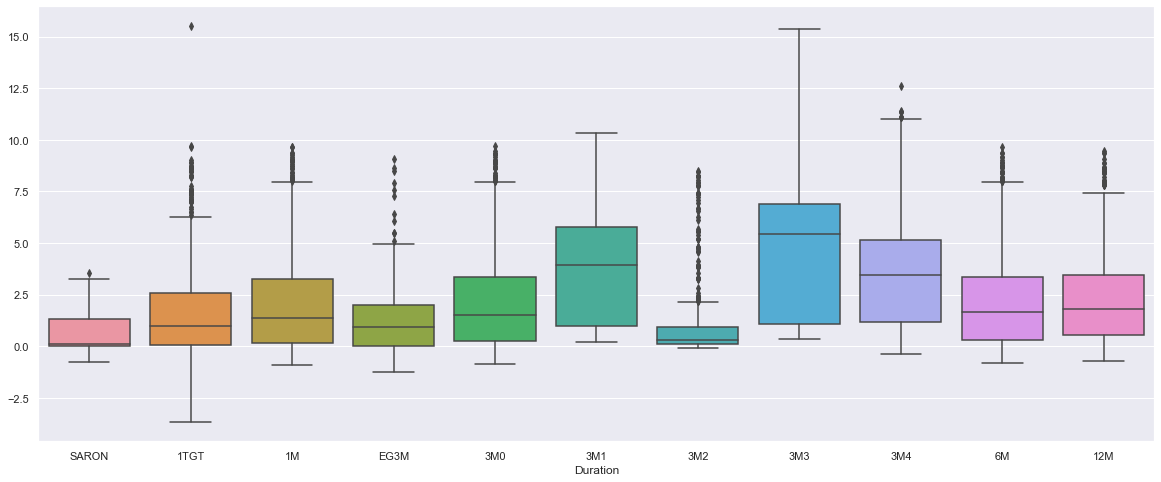

In [12]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,order=['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


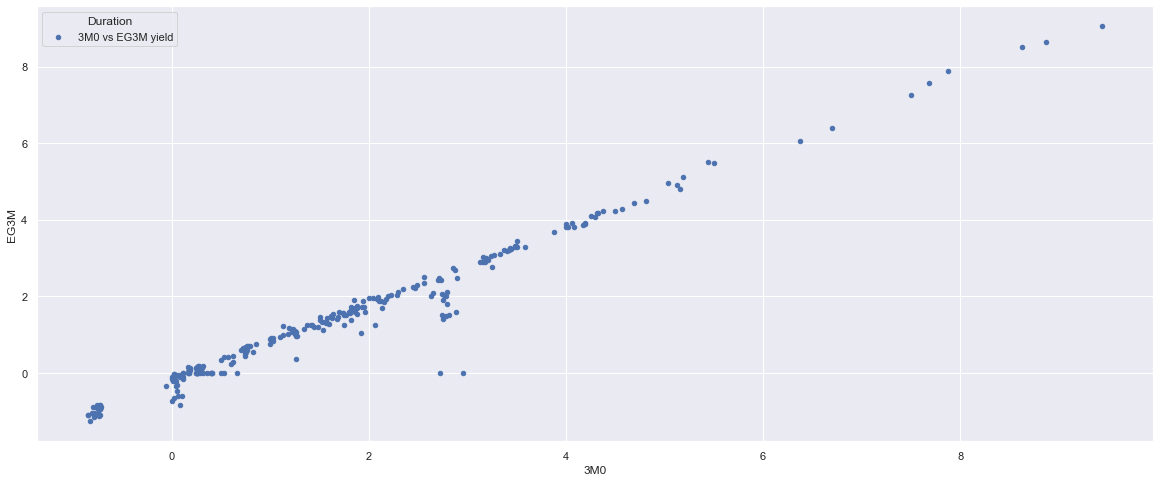

In [13]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', 'EG3M'
ax = df.plot.scatter(x='3M0', y='EG3M', label='3M0 vs EG3M yield',figsize=(20,8))
ax.xaxis.label.set_text('3M0')
ax.yaxis.label.set_text('EG3M')




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


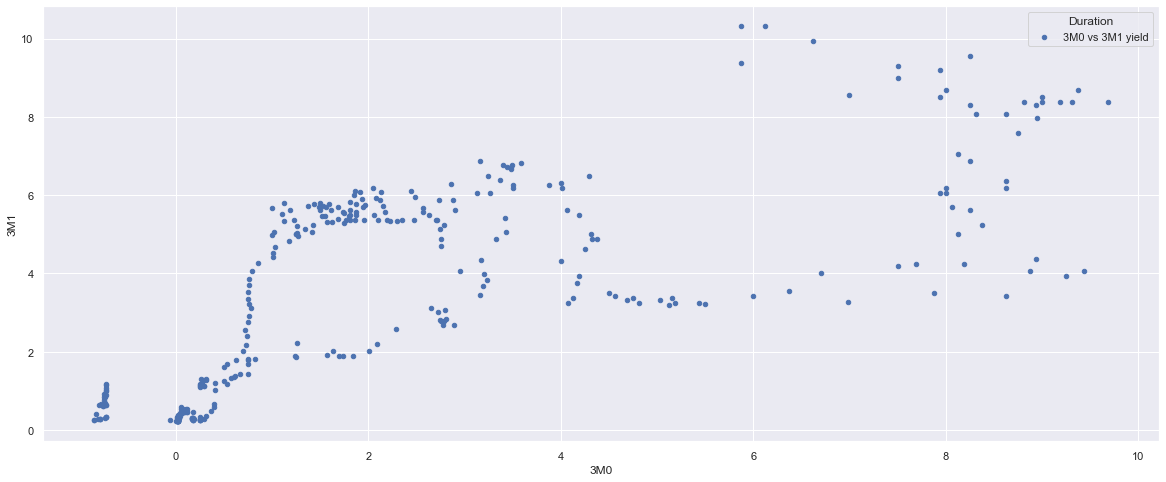

In [14]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M1'

ax = df.plot.scatter(x='3M0', y='3M1', label='3M0 vs 3M1 yield',figsize=(20,8))
ax.xaxis.label.set_text('3M0')
ax.yaxis.label.set_text('3M1')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


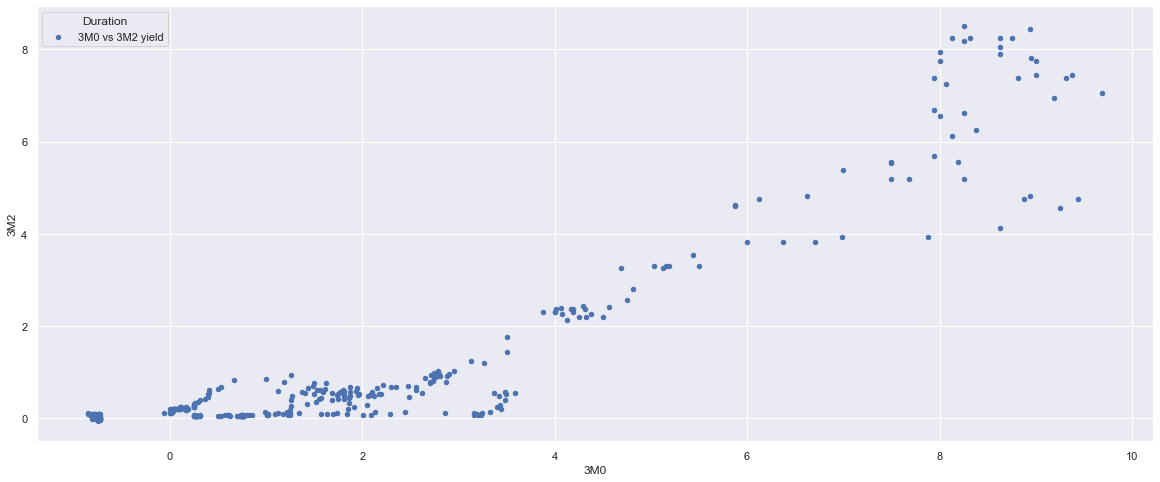

In [15]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M2'
ax = df.plot.scatter(x='3M0', y='3M2', label='3M0 vs 3M2 yield',figsize=(20,8))
ax.xaxis.label.set_text('3M0')
ax.yaxis.label.set_text('3M2')



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


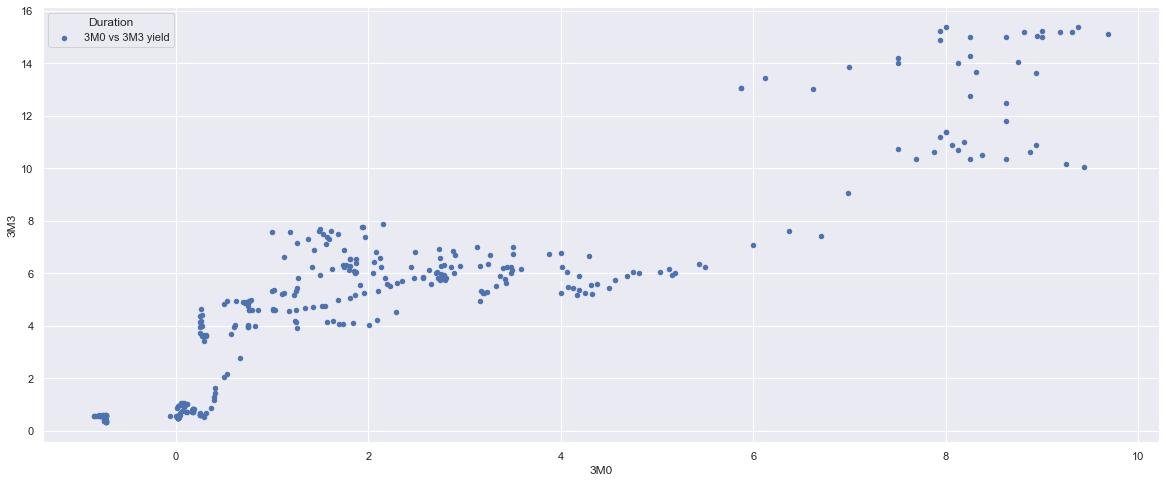

In [16]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M3'
ax = df.plot.scatter(x='3M0', y='3M3', label='3M0 vs 3M3 yield',figsize=(20,8))
ax.xaxis.label.set_text('3M0')
ax.yaxis.label.set_text('3M3')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


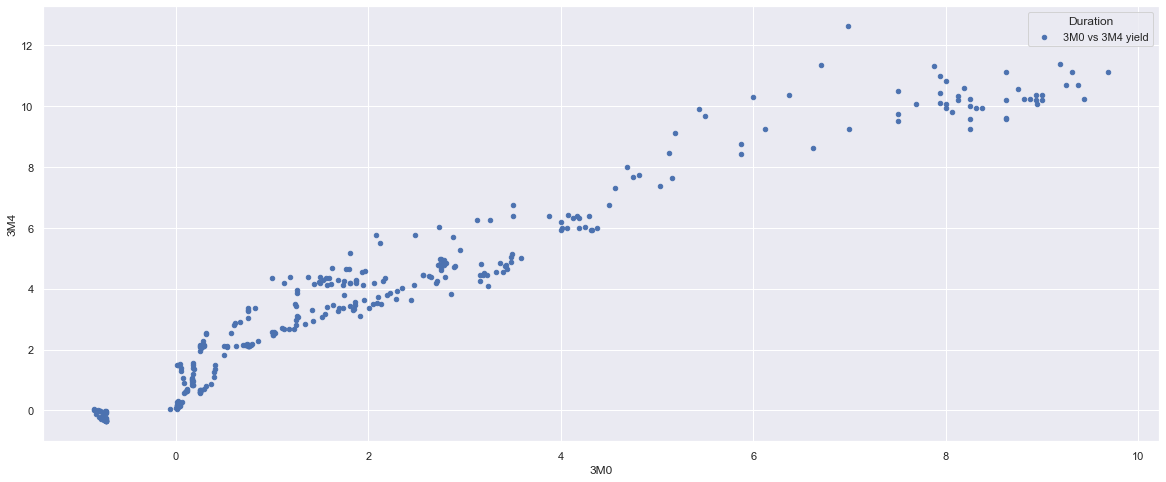

In [17]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', '3M4'
ax = df.plot.scatter(x='3M0', y='3M4', label='3M0 vs 3M4 yield',figsize=(20,8))
ax.xaxis.label.set_text('3M0')
ax.yaxis.label.set_text('3M4')

In [18]:
df.head()

Duration,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON
Date,,,,,,,,,,,
1972-01-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


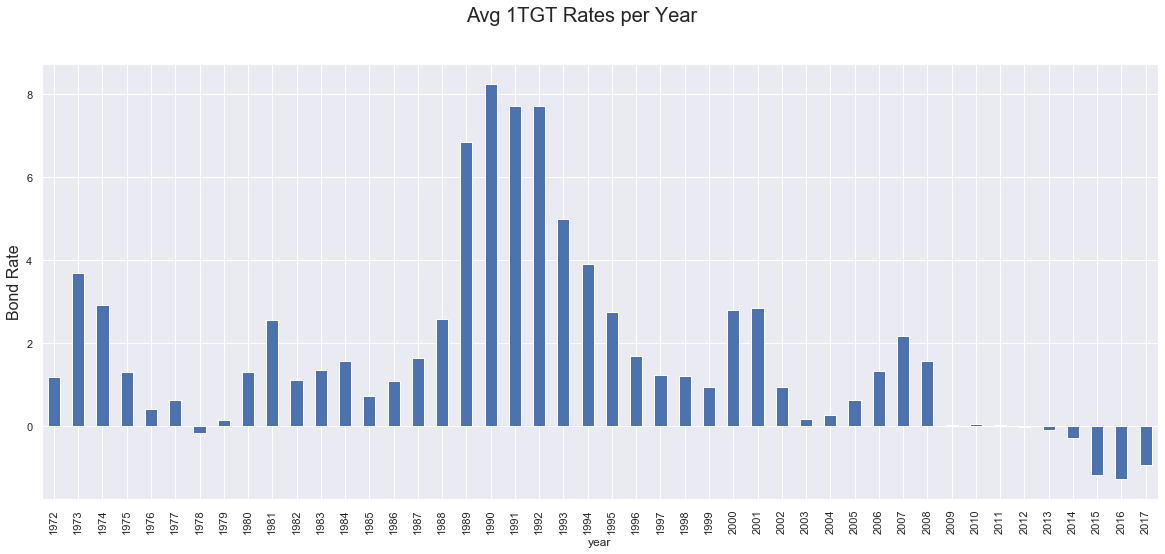

In [19]:
# vertical bar plot of avg 1TGT rates per year
plt.figure(figsize=(20,8))
plt.suptitle('Avg 1TGT Rates per Year', fontsize=20)
plt.ylabel('Bond Rate', fontsize=16)
tdf = pd.DataFrame(df)
tdf['year'] = [x.year for x in tdf.index]
tdf.groupby('year').mean()['1TGT'].plot.bar(color=sns.color_palette()[0])

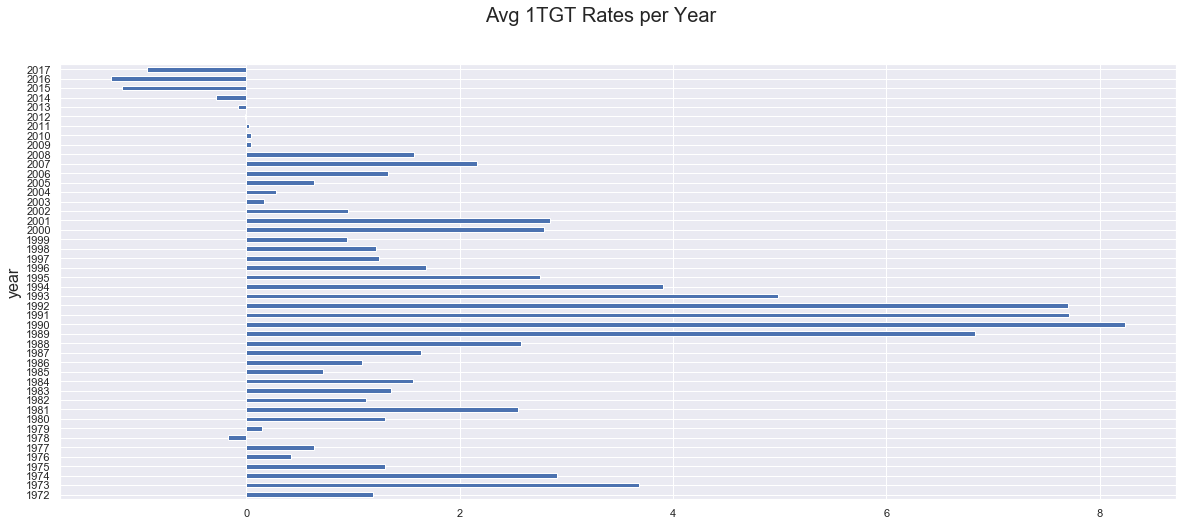

In [20]:
# horizontal bar plot of avg 1TGT rates per year

plt.figure(figsize=(20,8))
plt.suptitle('Avg 1TGT Rates per Year', fontsize=20)
plt.ylabel('Bond Rate', fontsize=16)
tdf = pd.DataFrame(df)
tdf['year'] = [x.year for x in tdf.index]
tdf.groupby('year').mean()['1TGT'].plot.barh(color=sns.color_palette()[0]) #simply change .bar to .barh for horizontal



In [21]:
df.head()

Duration,12M,1M,1TGT,3M0,3M1,3M2,3M3,3M4,6M,EG3M,SARON,year
Date,,,,,,,,,,,,
1972-01-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-02-01,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-03-01,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-04-01,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-05-01,NaN,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972


In [22]:
df.columns[0:-1]

Index(['12M', '1M', '1TGT', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', 'EG3M',
       'SARON'],
      dtype='object', name='Duration')

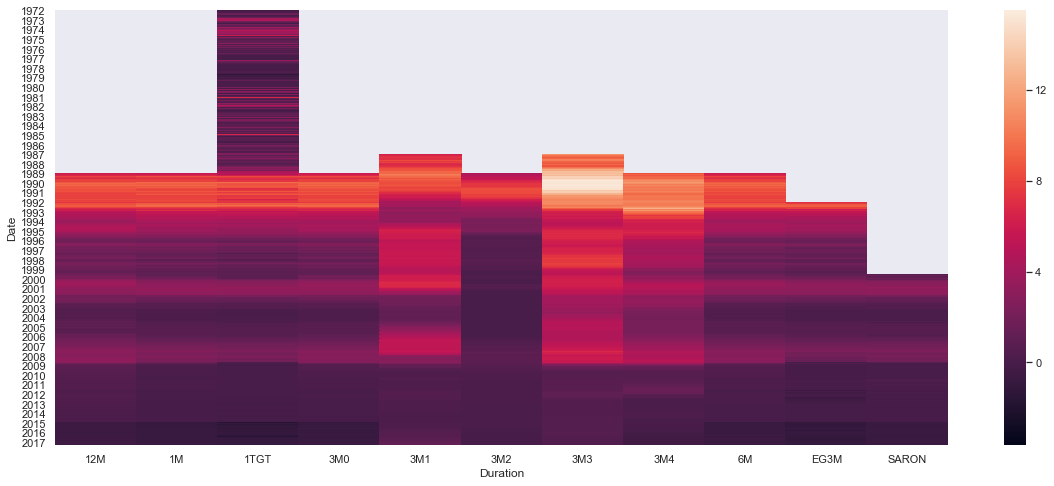

In [23]:
# heatmap of all money-market rates
# Plot the heatmap with labels fixed
labels = [t.strftime("%Y") if i%12 == 0 else "" for i, t in enumerate(df.index)] #can list month by adding %Y-%m"
plt.figure(figsize=(20,8))


cols = df.columns[0:-1] 
ax1 = sns.heatmap(df.drop('year',axis=1), xticklabels=cols,yticklabels=labels)
ax1
None


In [24]:
#reimporting the data again so that we can use solutions

df = pd.read_csv("~/Documents/DS_Git/Visualization/Day-1-Visualization-Intro/data/snb-data-zimoma-en-all-20170502_1430.csv")

df['Date'] = pd.to_datetime(df['Date'])
tdf = df.set_index(['Date', 'D0']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
tdf = tdf[term_order]
tdf.head()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


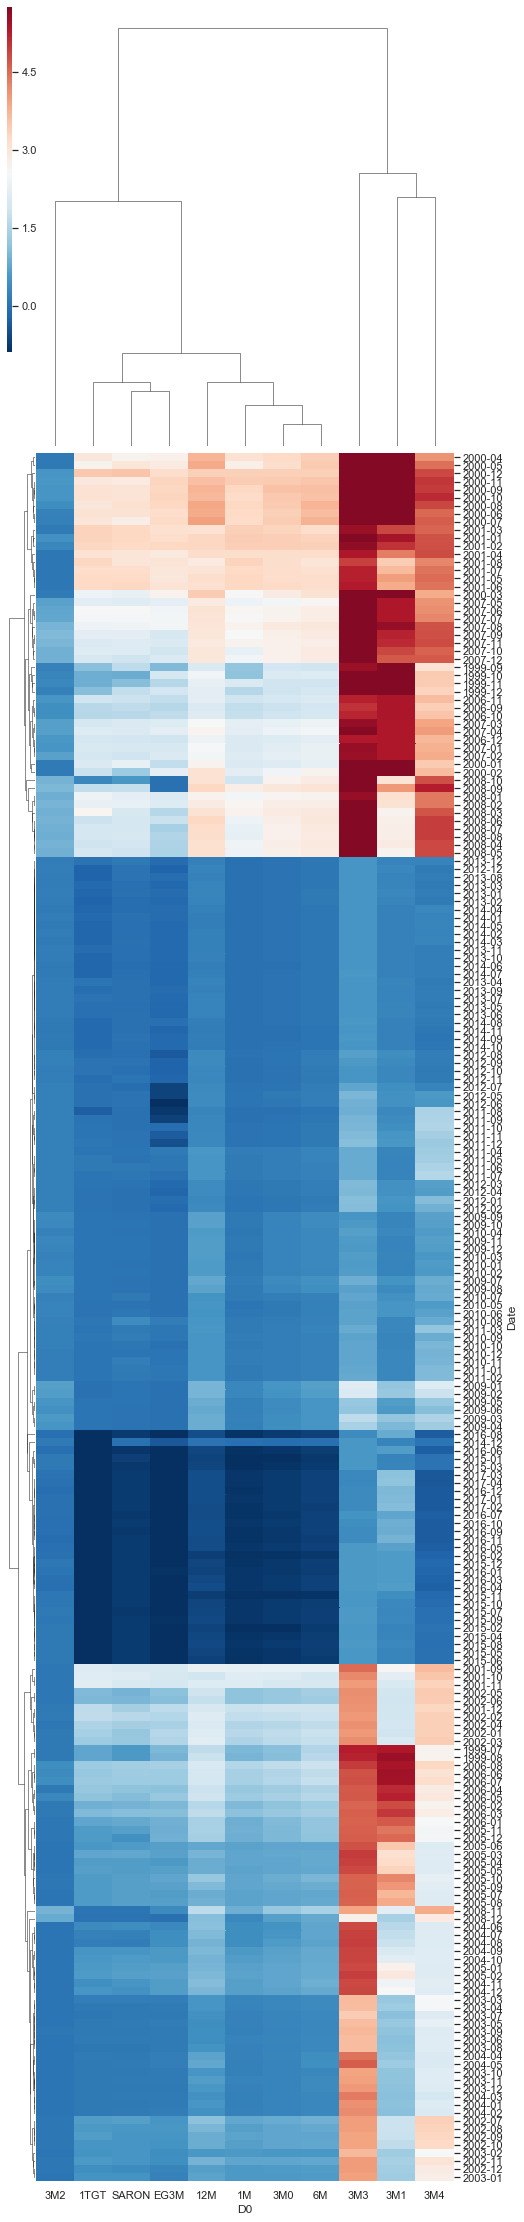

In [25]:
# clustered heatmap of all money-market rates

labels = [t.strftime("%Y-%m") for i, t in enumerate(tdf.dropna().index)]
cg = sns.clustermap(tdf.dropna(), yticklabels=labels, robust=True, center=tdf.stack().mean(), cmap='RdBu_r', figsize=(8, 40))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

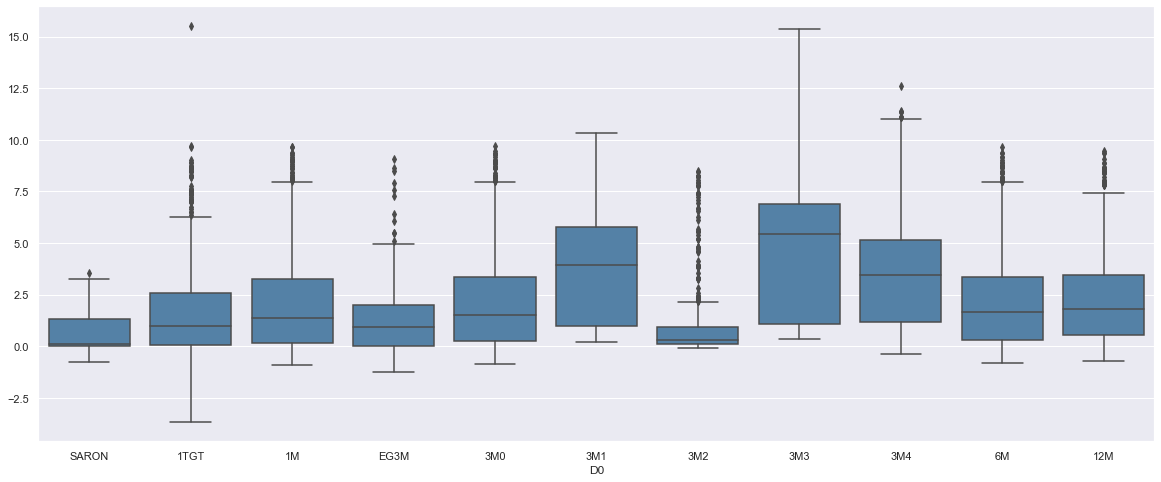

In [27]:
# boxplots with outliers
plt.figure(figsize=(20,8))
sns.boxplot(data=tdf, color='steelblue');

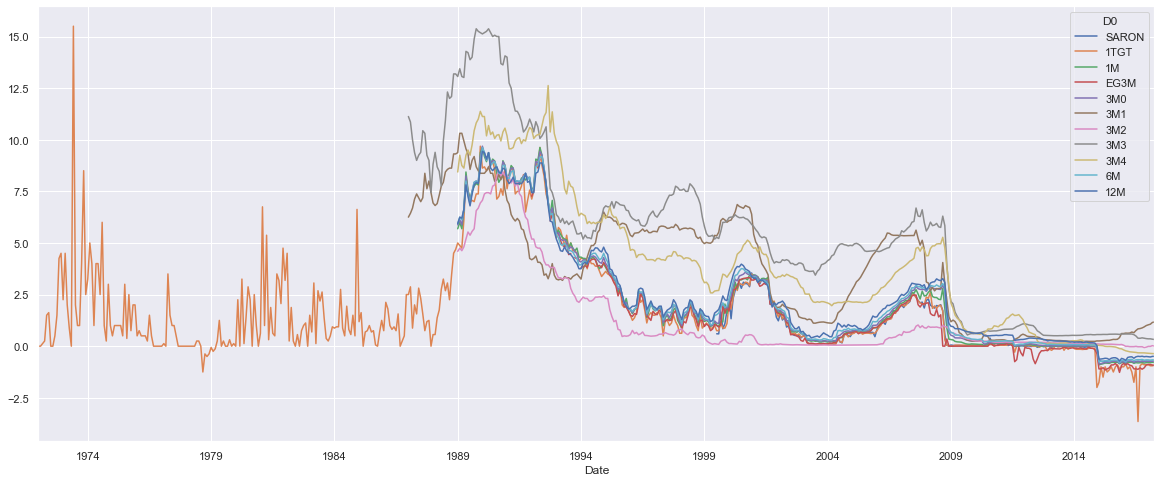

In [30]:
# time-series plots of all series
_ = tdf.plot(figsize=(20,8))

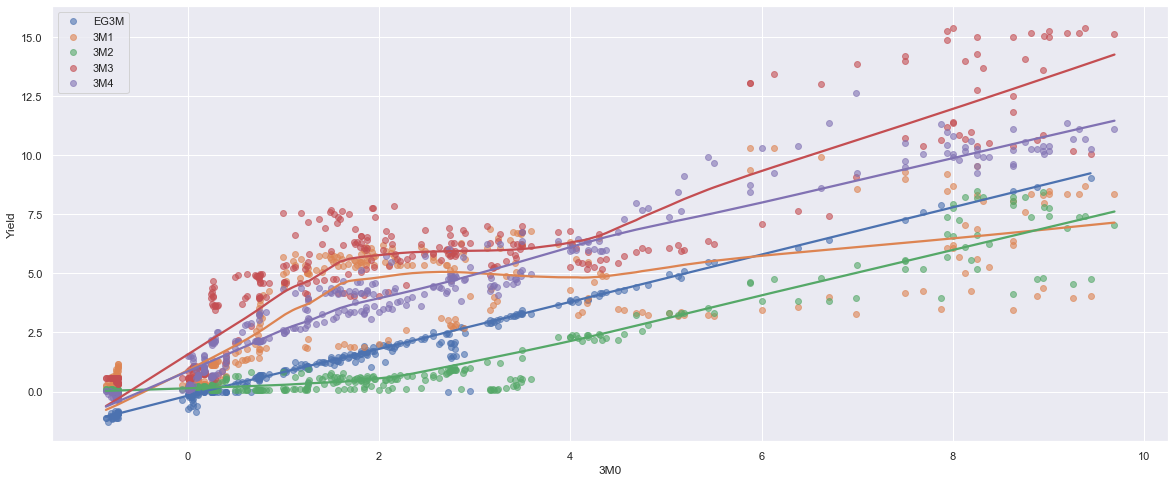

In [33]:
# scatter plot of 3M0 vs. EG3M and 3M[1..4] with regression
# scatter plot of 3M0 vs. EG3M and 3M[1..4], with LOWESS trend
fig, ax = plt.subplots(figsize=(20,8))
scatter_kws = {'alpha': 0.6}
sns.regplot(x='3M0', y='EG3M', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="EG3M")
sns.regplot(x='3M0', y='3M1', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M1")
sns.regplot(x='3M0', y='3M2', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M2")
sns.regplot(x='3M0', y='3M3', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M3")
sns.regplot(x='3M0', y='3M4', lowess=True, data=tdf, ax=ax, scatter_kws=scatter_kws, label="3M4")
ax.set_ylabel("Yield")
ax.legend()
None

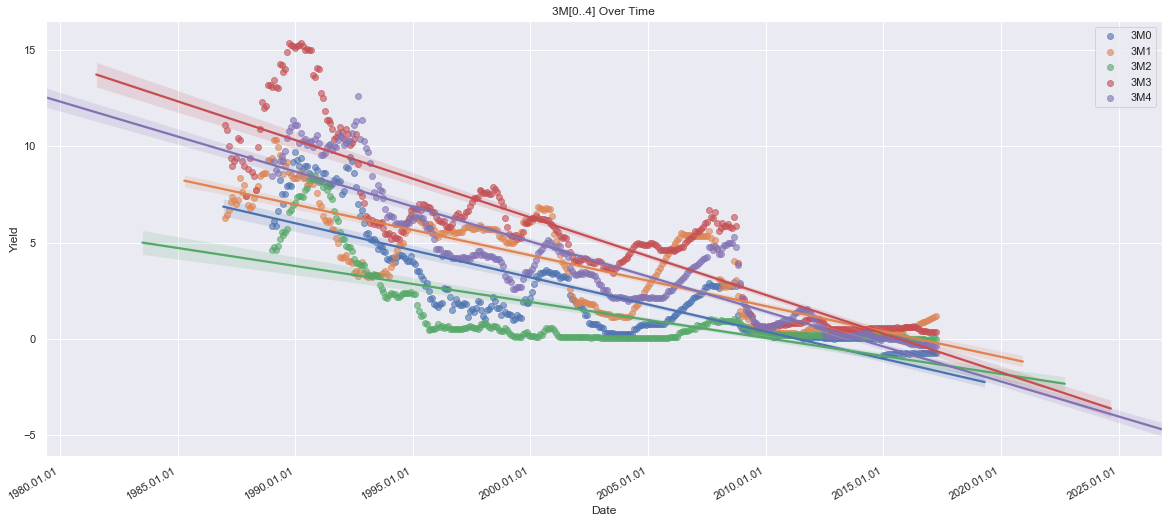

In [35]:
# scatter plot of 3M[0..4] over time with regression, with dates nicely formatted

import matplotlib.dates as mdates

fix, ax = plt.subplots(figsize=(20,8))
ttdf = tdf.reset_index()
ttdf['Date'] = ttdf['Date'].apply(lambda x: mdates.date2num(x))
scatter_kws = {'alpha': 0.6}
for i in range (0, 5):
    var = '3M{}'.format(i)
    sns.regplot(x='Date', y=var, data=ttdf, ax=ax, scatter_kws=scatter_kws, label=var)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_title("3M[0..4] Over Time")
ax.set_ylabel("Yield")
ax.legend()
None